In [2]:
import numpy

In [4]:
a = numpy.zeros((2, 3), dtype=numpy.float32)

In [6]:
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)

In [8]:
a; # ничего не выведет

In [9]:
type(a)

numpy.ndarray

In [11]:
a = numpy.zeros((2, 3, 4), dtype=numpy.float32)
a

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]], dtype=float32)

In [12]:
# сложение со скаляром, display -- вывод с помощью jupyter (colab)
a += 1
display(a)

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]], dtype=float32)

In [13]:
# умножение на скаляр
a *=2
display(a)

array([[[ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.]],

       [[ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.]]], dtype=float32)

In [14]:
ones = lambda *shape: numpy.ones(shape, dtype=numpy.float32)

In [16]:
ones(1)

array([ 1.], dtype=float32)

In [17]:
ones(0)

array([], dtype=float32)

In [18]:
ones(3)

array([ 1.,  1.,  1.], dtype=float32)

In [23]:
ones(0,1)

array([], shape=(0, 1), dtype=float32)

## Задача
вывести красиво операцию A + B = C на экран

In [24]:
my_input = [ones(2,3), '+', ones(2,3), '=', ones(2,3)*2]

In [25]:
print(my_input)

[array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32), '+', array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32), '=', array([[ 2.,  2.,  2.],
       [ 2.,  2.,  2.]], dtype=float32)]


In [26]:
print(*my_input)

[[ 1.  1.  1.]
 [ 1.  1.  1.]] + [[ 1.  1.  1.]
 [ 1.  1.  1.]] = [[ 2.  2.  2.]
 [ 2.  2.  2.]]


In [27]:
display(my_input)

[array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=float32), '+', array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=float32), '=', array([[ 2.,  2.,  2.],
        [ 2.,  2.,  2.]], dtype=float32)]

In [28]:
# пусть наша функция имеет такой формат:
def pp(*lst):
    pass
pp(*my_input)

In [29]:
# вывод через repr
lines = [repr(a).split('\n') for a in my_input]
lines

[['array([[ 1.,  1.,  1.],', '       [ 1.,  1.,  1.]], dtype=float32)'],
 ["'+'"],
 ['array([[ 1.,  1.,  1.],', '       [ 1.,  1.,  1.]], dtype=float32)'],
 ["'='"],
 ['array([[ 2.,  2.,  2.],', '       [ 2.,  2.,  2.]], dtype=float32)']]

In [30]:
# вывод через str
lines = [str(a).split('\n') for a in my_input]
lines

[['[[ 1.  1.  1.]', ' [ 1.  1.  1.]]'],
 ['+'],
 ['[[ 1.  1.  1.]', ' [ 1.  1.  1.]]'],
 ['='],
 ['[[ 2.  2.  2.]', ' [ 2.  2.  2.]]']]

In [31]:
max_lines = max([len(line) for line in lines])
max_lines

2

In [32]:
lines = [line + ['']*(max_lines - len(line)) for line in lines]
lines        

[['[[ 1.  1.  1.]', ' [ 1.  1.  1.]]'],
 ['+', ''],
 ['[[ 1.  1.  1.]', ' [ 1.  1.  1.]]'],
 ['=', ''],
 ['[[ 2.  2.  2.]', ' [ 2.  2.  2.]]']]

## транспонирование, reshape, операция получения максимума

In [34]:
lines_arr = numpy.array(lines)
lines_arr.T

array([['[[ 1.  1.  1.]', '+', '[[ 1.  1.  1.]', '=', '[[ 2.  2.  2.]'],
       [' [ 1.  1.  1.]]', '', ' [ 1.  1.  1.]]', '', ' [ 2.  2.  2.]]']],
      dtype='<U15')

In [36]:
widths = [len(x) for x in lines]
display(widths)

[2, 2, 2, 2, 2]

In [38]:
lines_arr.shape

(5, 2)

In [42]:
# преобразование к плоскому виду
lines_arr.flatten().shape

(10,)

In [43]:
widths = numpy.array([len(x) for x in lines_arr.flatten()])
display(widths)

array([14, 15,  1,  0, 14, 15,  1,  0, 14, 15])

In [44]:
widths = widths.reshape(len(lines_arr), -1)
display(widths)

array([[14, 15],
       [ 1,  0],
       [14, 15],
       [ 1,  0],
       [14, 15]])

In [45]:
# другой способ сделать решейп
widths = widths.reshape(*lines_arr.shape)
display(widths)

array([[14, 15],
       [ 1,  0],
       [14, 15],
       [ 1,  0],
       [14, 15]])

In [49]:
# считаем максимум
numpy.max(widths)

15

In [51]:
# другим способом
widths.max()

15

In [52]:
line_widths = widths.max(axis=1)

форматирование всё равно придётся делать поэлементно. зашли в тупик..

In [55]:
lines = [str(a).split('\n') for a in my_input]; 
lines

[['[[ 1.  1.  1.]', ' [ 1.  1.  1.]]'],
 ['+'],
 ['[[ 1.  1.  1.]', ' [ 1.  1.  1.]]'],
 ['='],
 ['[[ 2.  2.  2.]', ' [ 2.  2.  2.]]']]

In [57]:
max_lines = max([len(line) for line in lines])
max_lines

2

In [58]:
def fmt_item(lines, max_lines=0):
    max_width = max([len(line) for line in lines])
    empty = ' '*max_width
    lines = [line.ljust(max_width) for line in lines]
    lines += [empty] * (max_lines - len(lines))
    return lines 

In [59]:
fmt_item(str(numpy.arange(1, 5).reshape(2,-1)).split('\n'), max_lines=3)

['[[1 2] ', ' [3 4]]', '       ']

In [60]:
results = fmt_item(str(numpy.arange(1, 5).reshape(2,-1)).split('\n'), max_lines=3)
print('\n'.join(results))

[[1 2] 
 [3 4]]
       


In [61]:
# а что делать дальше, когда у нас есть такие массивы? 
# воспользуемся array().T

In [62]:
def pp(*lst):
    lines = [str(item).split('\n') for item in lst]
    max_lines = max([len(item) for item in lines])
    lines = [fmt_item(item, max_lines=max_lines) for item in lines]
    lines_t = numpy.array(lines).T
    print('\n'.join([' '.join(line) for line in lines_t]))
    
pp(*my_input)

[[ 1.  1.  1.]  + [[ 1.  1.  1.]  = [[ 2.  2.  2.] 
 [ 1.  1.  1.]]    [ 1.  1.  1.]]    [ 2.  2.  2.]]


## Попробуем нашу функцию:

In [70]:
A = numpy.arange(1, 11).reshape(5,2);
B = numpy.linspace(10, 30, 10).reshape(5,2)
R = A * B

In [74]:
display(A)
display(B)
display(R)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

array([[ 10.        ,  12.22222222],
       [ 14.44444444,  16.66666667],
       [ 18.88888889,  21.11111111],
       [ 23.33333333,  25.55555556],
       [ 27.77777778,  30.        ]])

array([[  10.        ,   24.44444444],
       [  43.33333333,   66.66666667],
       [  94.44444444,  126.66666667],
       [ 163.33333333,  204.44444444],
       [ 250.        ,  300.        ]])

In [69]:
pp(A, '*', B, '=', R)

[[ 1  2]  * [[ 10.          12.22222222]  = [[  10.           24.44444444] 
 [ 3  4]     [ 14.44444444  16.66666667]     [  43.33333333   66.66666667] 
 [ 5  6]     [ 18.88888889  21.11111111]     [  94.44444444  126.66666667] 
 [ 7  8]     [ 23.33333333  25.55555556]     [ 163.33333333  204.44444444] 
 [ 9 10]]    [ 27.77777778  30.        ]]    [ 250.          300.        ]]


In [78]:
import operator
#operator.add = lambda x, y: x + y

def op(x, name, y, func):
    r = func(x, y)
    pp(x, name, y, '=', r)

In [79]:
op(numpy.array([[1,2], [3,4]]), '+', numpy.array([[5,6], [7,8]]), operator.add)

[[1 2]  + [[5 6]  = [[ 6  8] 
 [3 4]]    [7 8]]    [10 12]]


In [80]:
# вспомним классы, оформим в виде класса

In [82]:
class Op:
    def __init__(self, name, func):
        self.name = name
        self.func = func
        
    def __call__(self, x, y):
        r = self.func(x, y)
        pp(x, self.name, y, '=', r)

In [87]:
SSum = Op('+', lambda x,y: x + y)

In [88]:
SMul = Op('*', lambda x,y: x * y )

In [89]:
MMul = Op('@', lambda x,y: x @ y )

In [90]:
SSum(A,B)

[[ 1  2]  + [[ 10.          12.22222222]  = [[ 11.          14.22222222] 
 [ 3  4]     [ 14.44444444  16.66666667]     [ 17.44444444  20.66666667] 
 [ 5  6]     [ 18.88888889  21.11111111]     [ 23.88888889  27.11111111] 
 [ 7  8]     [ 23.33333333  25.55555556]     [ 30.33333333  33.55555556] 
 [ 9 10]]    [ 27.77777778  30.        ]]    [ 36.77777778  40.        ]]


In [91]:
SMul(A,B)

[[ 1  2]  * [[ 10.          12.22222222]  = [[  10.           24.44444444] 
 [ 3  4]     [ 14.44444444  16.66666667]     [  43.33333333   66.66666667] 
 [ 5  6]     [ 18.88888889  21.11111111]     [  94.44444444  126.66666667] 
 [ 7  8]     [ 23.33333333  25.55555556]     [ 163.33333333  204.44444444] 
 [ 9 10]]    [ 27.77777778  30.        ]]    [ 250.          300.        ]]


In [93]:
MMul(A.T, B)

[[ 1  3  5  7  9]  @ [[ 10.          12.22222222]  = [[ 561.11111111  616.66666667] 
 [ 2  4  6  8 10]]    [ 14.44444444  16.66666667]     [ 655.55555556  722.22222222]]
                      [ 18.88888889  21.11111111]                                   
                      [ 23.33333333  25.55555556]                                   
                      [ 27.77777778  30.        ]]                                  


## Простая индексация

In [95]:
pp(B[0, :], B[-1, -2], B[:, 0])

[ 10.          12.22222222] 27.7777777778 [ 10.          14.44444444  18.88888889  23.33333333  27.77777778]


## Broadcasting и stack

In [97]:
SSum(A, B[0])  # что произойдёт? это преобразование называется broadcasting

[[ 1  2]  + [ 10.          12.22222222] = [[ 11.          14.22222222] 
 [ 3  4]                                   [ 13.          16.22222222] 
 [ 5  6]                                   [ 15.          18.22222222] 
 [ 7  8]                                   [ 17.          20.22222222] 
 [ 9 10]]                                  [ 19.          22.22222222]]


In [98]:
SMul(A, B[0])  # смотрим ещё раз, на умножении

[[ 1  2]  * [ 10.          12.22222222] = [[  10.           24.44444444] 
 [ 3  4]                                   [  30.           48.88888889] 
 [ 5  6]                                   [  50.           73.33333333] 
 [ 7  8]                                   [  70.           97.77777778] 
 [ 9 10]]                                  [  90.          122.22222222]]


In [99]:
SMul(A, numpy.stack(list(B[0:1])*5))

[[ 1  2]  * [[ 10.          12.22222222]  = [[  10.           24.44444444] 
 [ 3  4]     [ 10.          12.22222222]     [  30.           48.88888889] 
 [ 5  6]     [ 10.          12.22222222]     [  50.           73.33333333] 
 [ 7  8]     [ 10.          12.22222222]     [  70.           97.77777778] 
 [ 9 10]]    [ 10.          12.22222222]]    [  90.          122.22222222]]


## Бинарные и логические операции с массивами

In [100]:
pp(A, A>3, B, B>=10.) # сравнение float -- дело неточное

[[ 1  2]  [[False False]  [[ 10.          12.22222222]  [[ True  True] 
 [ 3  4]   [False  True]   [ 14.44444444  16.66666667]   [ True  True] 
 [ 5  6]   [ True  True]   [ 18.88888889  21.11111111]   [ True  True] 
 [ 7  8]   [ True  True]   [ 23.33333333  25.55555556]   [ True  True] 
 [ 9 10]]  [ True  True]]  [ 27.77777778  30.        ]]  [ True  True]]


In [109]:
# можно делать приближенные сравнения
pp(numpy.isclose(B, 10), (10 - 1e-7 <= B) & (B <= 10 + 1e-7))

[[ True False]  [[ True False] 
 [False False]   [False False] 
 [False False]   [False False] 
 [False False]   [False False] 
 [False False]]  [False False]]


In [103]:
idx = numpy.isclose(B, 10) | numpy.isclose(B, 30)
B[idx]

array([ 10.,  30.])

## Индексация массивов

In [105]:
pp(B)

[[ 10.          12.22222222] 
 [ 14.44444444  16.66666667] 
 [ 18.88888889  21.11111111] 
 [ 23.33333333  25.55555556] 
 [ 27.77777778  30.        ]]


In [106]:
pp(numpy.isclose(B[1:-1, 1:-1], 10))  # классическая индексация питона

[]


In [107]:
pp(numpy.isclose(B[0], 10))   # берём первую строку

[ True False]


In [108]:
pp(numpy.isclose(B[:, 1], 10))   # берём второй столбец

[False False False False False]


## Cлучайные значения

In [110]:
pp(numpy.random.uniform(0, 1), numpy.random.randn(2, 3), numpy.random.rand(2, 3))

0.5585653363827051 [[ 0.71451641 -1.12096367  1.00078296]  [[ 0.87510171  0.28899264  0.26744987] 
                    [-0.59704203  1.30486104 -1.44823543]]  [ 0.28524607  0.12688044  0.05011297]]


In [115]:
import random
random.seed(10)
numpy.random.seed(10)
nr = numpy.random.uniform(0, 1)
nr2 = numpy.random.uniform(0, 1)
rr = random.uniform(0, 1)
rr2 = random.uniform(0, 1)
pp(rr, nr, rr2, nr2)

random.seed(10)
numpy.random.seed(10)
rr = random.uniform(0, 1)
nr = numpy.random.uniform(0, 1)
rr2 = random.uniform(0, 1)
nr2 = numpy.random.uniform(0, 1)
pp(rr, nr, rr2, nr2)

0.5714025946899135 0.771320643266746 0.4288890546751146 0.0207519493594015
0.5714025946899135 0.771320643266746 0.4288890546751146 0.0207519493594015


## matplotlib

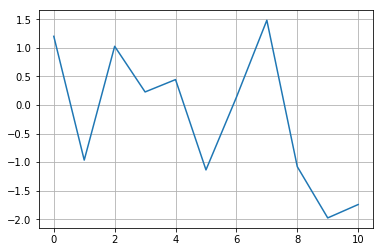

In [117]:
import matplotlib
# значение по умолчанию в colab, но не в локальных ноутбуках
# matplotlib.rcParams['axes.grid'] = True

import matplotlib.pyplot as plt
# нарисуем график для 11 случайных нормально распределённых чисел.
x = numpy.linspace(0, 10, 11)
dots = numpy.random.randn(11)
plt.plot(x, dots);

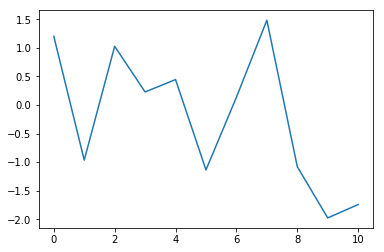

In [123]:
import matplotlib
matplotlib.rcParams['axes.grid'] = False  # убираем белую клетку (настройки colab)

import matplotlib.pyplot as plt
plt.plot(x, dots);  # рисуем линию ещё раз

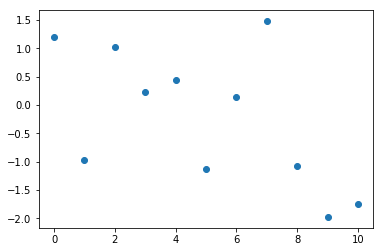

In [124]:
# если надо просто вывести точки, без линий между ними
plt.scatter(x, dots);

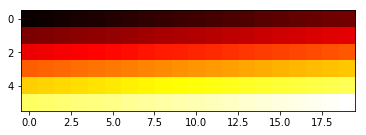

In [125]:
# выводим двумерный массив, используя цветовую схему 'hot'.
# matplotlib автоматически определяет минимум и максимум
# по нему настраивает цвета
plt.imshow(numpy.arange(0, 120).reshape(6, 20), 'hot');

## Строки и словари

In [129]:
#  Задача: определить, какой символ встречается чаще всего в данном тексте,
# не считая пробелов!
a = "Кот сидел на крыше тише мыши"
pp(set(list(a)))

{'е', 'с', 'ы', 'л', 'м', ' ', 'н', 'К', 'и', 'ш', 'а', 'т', 'к', 'о', 'д', 'р'}


In [130]:
# приближённое решение.
from collections import Counter

Counter(list(a)).most_common()
# убрать пробел и будет то, что надо. попробуйте сами.

[(' ', 5),
 ('и', 3),
 ('е', 3),
 ('ш', 3),
 ('т', 2),
 ('ы', 2),
 ('К', 1),
 ('о', 1),
 ('с', 1),
 ('д', 1),
 ('л', 1),
 ('н', 1),
 ('а', 1),
 ('к', 1),
 ('р', 1),
 ('м', 1)]

In [131]:
# напишем вручную код аналогичный тому, что происходит внутри Counter
counter = {}
for ch in list(a.lower()):
    if ch == ' ': continue
    if ch in counter:
        counter[ch] += 1
    else:
        counter[ch] = 1
    
pp(counter)

{'к': 2, 'о': 1, 'т': 2, 'с': 1, 'и': 3, 'д': 1, 'е': 3, 'л': 1, 'н': 1, 'а': 1, 'р': 1, 'ы': 2, 'ш': 3, 'м': 1}


In [132]:
pp(type(ch))  # в питоне даже отдельные символы -- это строчки

<class 'str'>


In [133]:
max(counter.values())  # нашли максимум

3

In [134]:
# алгоритм для поиска максимума
winner_ch = None
winner_count = 0
for ch, count in counter.items():
  if count > winner_count:
      winner_count = count
      winner_ch = ch
print(winner_ch, winner_count)  # и вот наш символ-победитель
# имейте в виду, победителя на самом деле три.
# исправьте код, чтобы вывести и второй и третий.

и 3
